In [14]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_allclose
pd.options.mode.copy_on_write = True # trigger immutable behavior

dataset = pd.read_csv('../datasets/Mall_Customers.csv')
X = dataset.iloc[:, 3:5].values

0

0

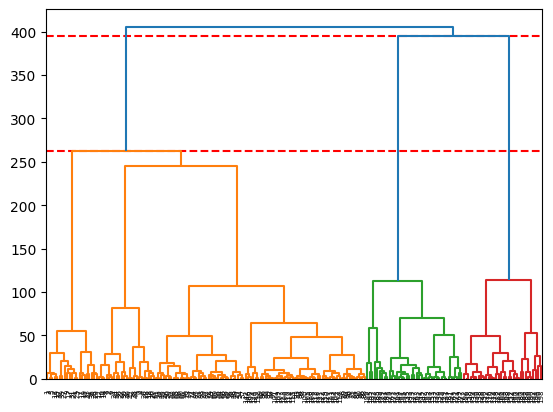

0

In [49]:
import scipy.cluster.hierarchy as sh
from typing import Dict, Union
from collections import namedtuple

def max_distance_data(linkage_matrix: np.ndarray) -> Dict[str, Union[int, float]]:
    maxDiff = -1
    for i in range(len(linkage_matrix) - 1):
        nextItemData = linkage_matrix[i + 1]
        data = linkage_matrix[i]
        diff = nextItemData[2] - data[2]
        if diff > maxDiff:
            maxDiff = diff
            maxDiffData = [diff, i, data[2], nextItemData[2], data, nextItemData]
    MaxDistance = namedtuple('MaxDistance', ['lower_boundary', 'upper_boundary', 'linkage_mtrx_idx'])
    return MaxDistance(maxDiffData[2], maxDiffData[3], maxDiffData[1]) if maxDiffData is not None else None


linkage_matrix = sh.linkage(X, method="ward")
max_distance = max_distance_data(linkage_matrix)

plot.axhline(y=max_distance.lower_boundary, color='r', linestyle='--')
plot.axhline(y=max_distance.upper_boundary, color='r', linestyle='--')

optimal_n_clusters = len(linkage_matrix) - max_distance.linkage_mtrx_idx

dendrogram = sh.dendrogram(linkage_matrix)

plot.show()

0

/Users/vladzams/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


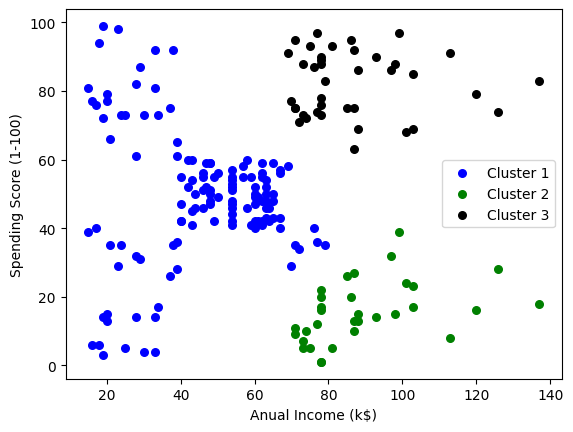

0

In [51]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=optimal_n_clusters, affinity='euclidean', linkage='ward')
y_hc = model.fit_predict(X)

colors = ['blue', 'green', 'black', 'purple', 'pink']

for i in np.arange(0, optimal_n_clusters):
  idx = np.where(model.labels_ == i)
  plot.scatter(X[idx, 0], X[idx, 1], s=30, c=colors[i], label=f'Cluster {i+1}')

plot.xlabel('Anual Income (k$)')
plot.ylabel('Spending Score (1-100)')

plot.legend()
plot.show()

0